In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/ai-perception.csv')

In [5]:
print(data['Article Date'][0])
type(data['Article Date'][0])

1996-10-06 00:00:00 UTC


str

In [3]:
print("Rows:", data.shape[0])
# Count NaNs in 'Article Date' column
print("Number of NaNs in 'Article Date' column: ", data['Article Date'].isnull().sum(), f"({round(data['Article Date'].isnull().sum()/data.shape[0]*100, 2)}%)")

Rows: 17073
Number of NaNs in 'Article Date' column:  7944 (46.53%)


In [5]:
# check number of occurances for each 'Article ID' 
print('Unique article IDs:', len(data['Article ID'].value_counts())) # 3367 unique article ids
# print number of articles with more than 3 entries
print('Articles with more than 3 workers:', len(data['Article ID'].value_counts()[data['Article ID'].value_counts() > 3]))

Unique article IDs: 3367
Articles with more than 3 workers: 1009


In [8]:
# # check the frequency of articles rated over the years in format 2015-02-23 03:27:02 UTC
# data['Date'] = pd.to_datetime(data['Article Date'], format='%Y-%m-%d %H:%M:%S UTC')
# data['Year'] = data['Date'].dt.year

# data.groupby(['Article ID', 'Year']).count()

In [6]:
# print columns of dataset
print(data.columns)
""" 
output: 'Article ID', 'Article Date', 'Paragraph number', 'NYT section',
       'Paragraph', 'Title', 'WorkTimeInSeconds', 'AI Mood', 'AI Relevance',
       'Fiction', 'Controling AI (negative)', 'Cyborg (negative)',
       'Ethics (negative)', 'Military (negative)', 'Progress (negative)',
       'Singularity (negative)', 'Work (negative)', 'Other (negative)',
       'Cyborg (positive)', 'Decisions (positive)', 'Education (positive)',
       'Entertain (positive)', 'Healthcare (positive)',
       'Singularity (positive)', 'Transportation (positive)',
       'Work (positive)', 'Other (positive)'] 
"""

Index(['Article ID', 'Article Date', 'Paragraph number', 'NYT section',
       'Paragraph', 'Title', 'WorkTimeInSeconds', 'AI Mood', 'AI Relevance',
       'Fiction', 'Controling AI (negative)', 'Cyborg (negative)',
       'Ethics (negative)', 'Military (negative)', 'Progress (negative)',
       'Singularity (negative)', 'Work (negative)', 'Other (negative)',
       'Cyborg (positive)', 'Decisions (positive)', 'Education (positive)',
       'Entertain (positive)', 'Healthcare (positive)',
       'Singularity (positive)', 'Transportation (positive)',
       'Work (positive)', 'Other (positive)'],
      dtype='object')


" \noutput: 'Article ID', 'Article Date', 'Paragraph number', 'NYT section',\n       'Paragraph', 'Title', 'WorkTimeInSeconds', 'AI Mood', 'AI Relevance',\n       'Fiction', 'Controling AI (negative)', 'Cyborg (negative)',\n       'Ethics (negative)', 'Military (negative)', 'Progress (negative)',\n       'Singularity (negative)', 'Work (negative)', 'Other (negative)',\n       'Cyborg (positive)', 'Decisions (positive)', 'Education (positive)',\n       'Entertain (positive)', 'Healthcare (positive)',\n       'Singularity (positive)', 'Transportation (positive)',\n       'Work (positive)', 'Other (positive)'] \n"

In [8]:
sentiment_subcols = ['Controling AI (negative)', 'Cyborg (negative)', 'Ethics (negative)', 'Military (negative)', 'Progress (negative)', 'Singularity (negative)', 'Work (negative)', 'Cyborg (positive)', 'Decisions (positive)', 'Education (positive)', 'Entertain (positive)', 'Healthcare (positive)', 'Singularity (positive)', 'Transportation (positive)', 'Work (positive)']

In [9]:
# create matrix for sparse sentiment matrix
data_sentiment = data[sentiment_subcols]
data_sentiment

,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),Singularity (negative),Work (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


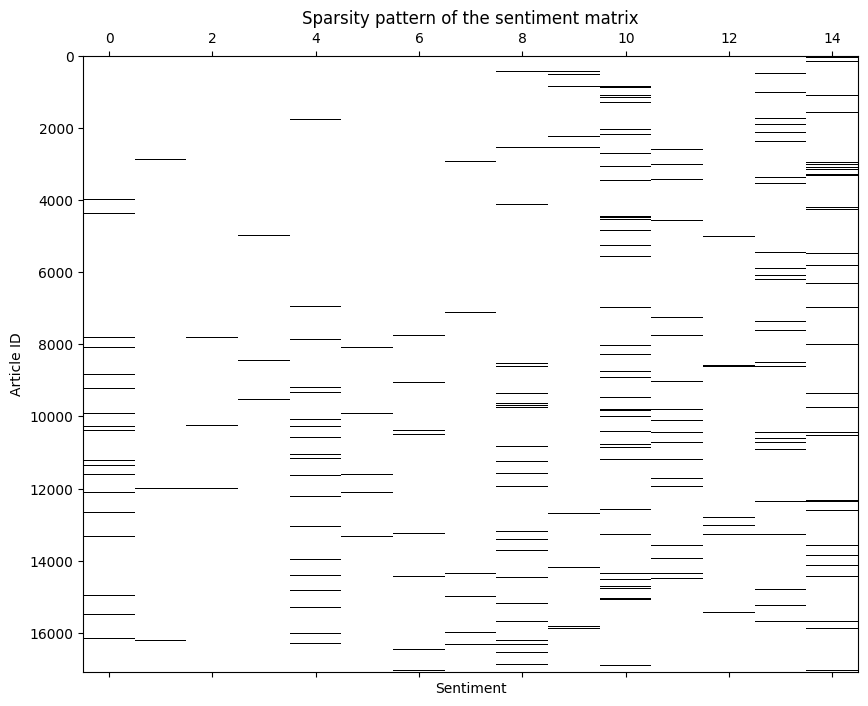

In [16]:
# plot sparsity patterns of the sentiment matrix
fig = plt.figure(figsize=(10, 8))
plt.spy(data_sentiment, aspect='auto') # precision=0.001,
plt.xlabel('Sentiment')
plt.ylabel('Article ID')
plt.title('Sparsity pattern of the sentiment matrix')
plt.show()

Text(0.5, 1.0, 'Sentiment Analysis of News Articles')

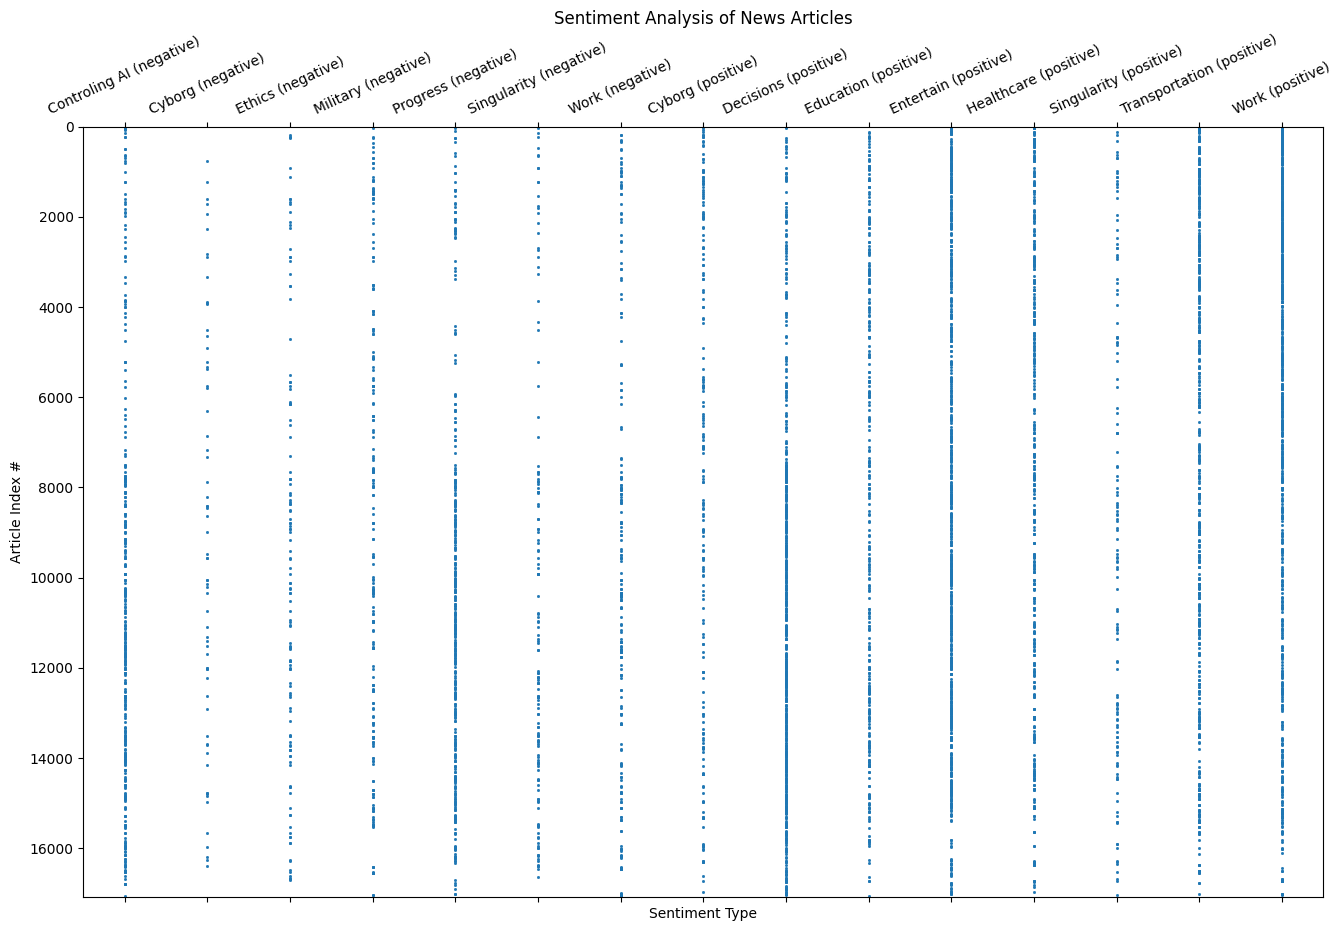

In [17]:
plt.figure(figsize=(16, 10))
plt.spy(data_sentiment, aspect='auto', markersize=1)
# plot sentiment feature labels on x-axis
plt.xticks(range(len(data_sentiment.columns)), data_sentiment.columns)
# rotate x-axis labels
plt.xticks(rotation=25)
#set y label to 'Article Index' 
plt.ylabel('Article Index #')
plt.xlabel('Sentiment Type')
# set title to 'Sentiment Analysis of News Articles'
plt.title('Sentiment Analysis of News Articles')